In [1]:
#import the libraries
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [2]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [4]:
df = load_data('AAPL')
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.320433,24.789802,23.879981,24.778679,212818400
1,2015-01-05,23.635286,24.169166,23.448429,24.089084,257142000
2,2015-01-06,23.637506,23.897772,23.274912,23.699792,263188400
3,2015-01-07,23.968962,24.069063,23.735389,23.846614,160423600
4,2015-01-08,24.889902,24.947740,24.180287,24.298187,237458000


In [7]:
print(df.columns)


MultiIndex([(  'Date',     ''),
            ( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [8]:
print(df.columns.get_level_values(0))  # To see the 'Price' level
print(df.columns.get_level_values(1))  # To see the 'Ticker' level


Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
Index(['', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL'], dtype='object', name='Ticker')


In [9]:
df = df.drop(('Date', ''), axis=1)


In [15]:
print(df.columns)

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [16]:
df = df.reset_index()

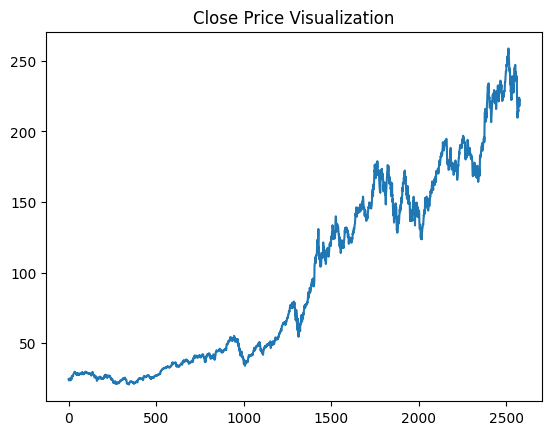

In [18]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [19]:
df

Price,index,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,0,24.320433,24.789802,23.879981,24.778679,212818400
1,1,23.635286,24.169166,23.448429,24.089084,257142000
2,2,23.637506,23.897772,23.274912,23.699792,263188400
3,3,23.968962,24.069063,23.735389,23.846614,160423600
4,4,24.889902,24.947740,24.180287,24.298187,237458000
...,...,...,...,...,...,...
2571,2571,223.750000,224.100006,220.080002,220.770004,34493600
2572,2572,221.529999,225.020004,220.470001,223.509995,34466100
2573,2573,223.850006,224.990005,220.559998,221.389999,37094800


Plotting moving averages of 100 day

In [21]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2571,234.766028
2572,234.649760
2573,234.592313
2574,234.517174


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

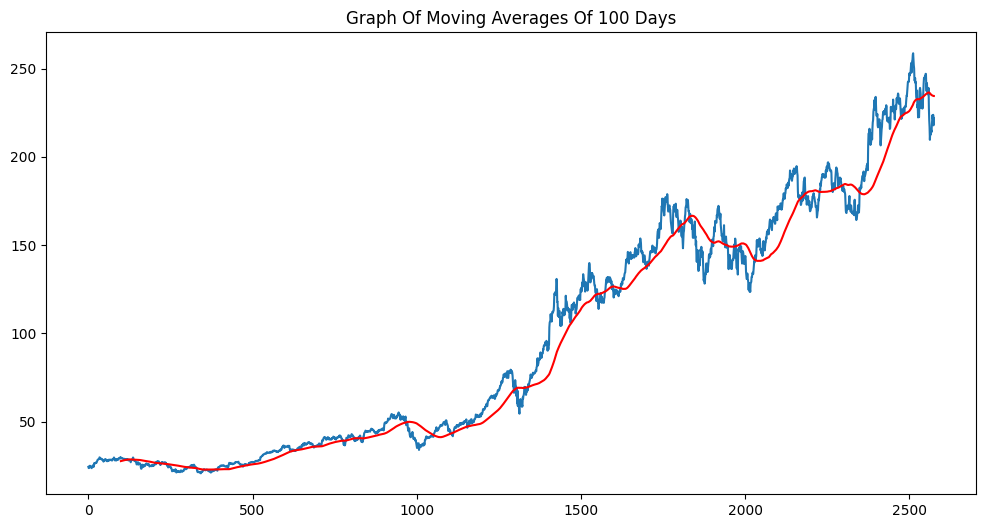

In [22]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

Defining 200 days moving averages and plotting comparision graph with 100 days moving averages


In [23]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2571,228.226233
2572,228.364740
2573,228.502837
2574,228.629972


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

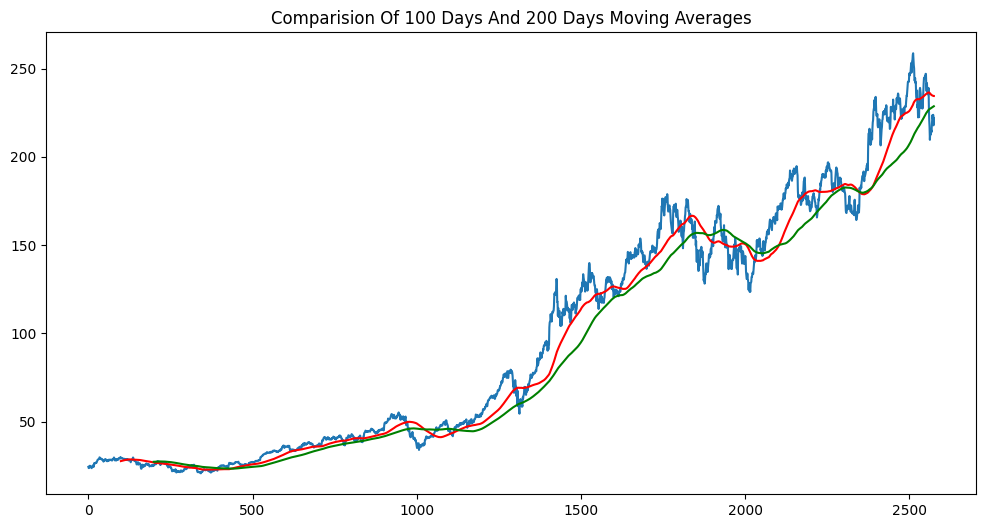

In [24]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [25]:
df.shape

(2576, 6)

Spliting the dataset into training (70%) and testing (30%) set

In [27]:
# Splitting data into training and testing

train = pd.DataFrame(df[0:int(len(df)*0.70)])
test = pd.DataFrame(df[int(len(df)*0.70): int(len(df))])

print(train.shape)
print(test.shape)

(1803, 6)
(773, 6)


In [28]:
train.head()

Price,index,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,0,24.320433,24.789802,23.879981,24.778679,212818400
1,1,23.635286,24.169166,23.448429,24.089084,257142000
2,2,23.637506,23.897772,23.274912,23.699792,263188400
3,3,23.968962,24.069063,23.735389,23.846614,160423600
4,4,24.889902,24.947740,24.180287,24.298187,237458000


In [29]:
test.head()

Price,index,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
1803,1803,163.904190,164.691437,160.351751,161.768793,79724800
1804,1804,163.579407,166.216681,162.910257,165.783695,76678400
1805,1805,160.568237,162.910293,159.515306,161.867197,83737200
1806,1806,156.759964,162.388760,156.504100,160.755225,96418800
1807,1807,154.929596,160.282857,153.315747,156.287596,131148300


Using MinMax scaler for normalization of the dataset

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [32]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [33]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.02631942],
       [0.02197942],
       [0.01952938],
       ...,
       [0.88506882],
       [0.88023795],
       [0.89039477]])

In [34]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [35]:
x_train.shape

(1703, 100, 1)

In [41]:
x_test = []
y_test = []

for i in range(100, test_close.shape[0]):
    x_test.append(data_training_array[i-100: i]) # using data_training_array for scaling, assuming it has the same range as test_close
    y_test.append(data_training_array[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

DL Model (LSTM)

In [42]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [43]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

Training the model

In [45]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 50)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 331ms/step - MAE: 0.1715 - loss: 0.0660 - val_MAE: 0.0291 - val_loss: 0.0010
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 325ms/step - MAE: 0.0751 - loss: 0.0122 - val_MAE: 0.0205 - val_loss: 5.5792e-04
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 344ms/step - MAE: 0.0518 - loss: 0.0068 - val_MAE: 0.0103 - val_loss: 1.7625e-04
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 323ms/step - MAE: 0.0445 - loss: 0.0049 - val_MAE: 0.0089 - val_loss: 1.2941e-04
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 324ms/step - MAE: 0.0397 - loss: 0.0040 - val_MAE: 0.0182 - val_loss: 4.7176e-04
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 375ms/step - MAE: 0.0423 - loss: 0.0044 - val_MAE: 0.0134 - val_loss: 2.7285e-04
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 309ms/step - MAE: 0.0415 - loss: 0.0047 - val_MAE: 0.0102 - val_loss: 1.6223e-04
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 307ms/step - MAE: 0.0387 - loss: 0.0042 - val_MAE: 0.0100 - val_loss: 1.6090e-04
Epoch 9/50
54/54 ━━━

In [46]:
model.save('keras_model.h5')

In [47]:
test_close.shape
test_close

array([[161.76879262],
       [165.78369465],
       [161.86719699],
       [160.75522487],
       [156.28759643],
       [158.90516856],
       [157.64559088],
       [156.3958138 ],
       [149.03513603],
       [148.49388799],
       [154.54581074],
       [156.08095391],
       [157.95062419],
       [160.90280343],
       [162.87089426],
       [165.31136885],
       [168.33240391],
       [171.10747948],
       [169.42471771],
       [173.87265188],
       [175.70298634],
       [175.00431394],
       [171.25505972],
       [171.78646946],
       [174.66974257],
       [169.6116968 ],
       [168.43080274],
       [169.04093899],
       [166.01991058],
       [165.34089363],
       [164.72092299],
       [167.89941733],
       [161.30627041],
       [162.38871858],
       [166.06907917],
       [166.21672062],
       [163.80576949],
       [158.550891  ],
       [159.66291645],
       [153.42400648],
       [156.71073111],
       [159.25942241],
       [154.21121583],
       [155

In [48]:
past_100_days = pd.DataFrame(train_close[-100:])

In [49]:
test_df = pd.DataFrame(test_close)

Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.



In [51]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [52]:
final_df.head()

,0
0,140.394849
1,141.346792
2,139.619587
3,140.561723
4,138.608766


In [53]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.11873826],
       [0.12587723],
       [0.11292429],
       [0.11998971],
       [0.10534378],
       [0.11174659],
       [0.12396382],
       [0.12160854],
       [0.1478089 ],
       [0.16024666],
       [0.16105641],
       [0.167533  ],
       [0.16009956],
       [0.16488331],
       [0.16510411],
       [0.16848958],
       [0.14935445],
       [0.16238111],
       [0.1599522 ],
       [0.17268468],
       [0.18144267],
       [0.18535582],
       [0.18181775],
       [0.1728993 ],
       [0.17157289],
       [0.16376048],
       [0.15985388],
       [0.17415237],
       [0.17098328],
       [0.1787958 ],
       [0.19876955],
       [0.22780874],
       [0.25751172],
       [0.25338449],
       [0.25065729],
       [0.24196044],
       [0.24048612],
       [0.2450556 ],
       [0.30025995],
       [0.23584276],
       [0.27475843],
       [0.27674825],
       [0.31205254],
       [0.33453232],
       [0.35502199],
       [0.35723304],
       [0.40079205],
       [0.357

In [54]:
input_data.shape

(873, 1)

Testing the model

In [55]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [56]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(773, 100, 1)
(773,)


Making prediction and plotting the graph of predicted vs actual values

In [57]:
# Making predictions

y_pred = model.predict(x_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step


In [58]:
y_pred.shape

(773, 1)

In [59]:
y_test

array([0.27902918, 0.30913837, 0.27976715, 0.27142807, 0.23792371,
       0.25755383, 0.2481078 , 0.23873527, 0.18353489, 0.17947588,
       0.22486143, 0.23637402, 0.25039535, 0.27253481, 0.28729423,
       0.30559623, 0.32825207, 0.34906336, 0.33644372, 0.36980038,
       0.38352672, 0.37828713, 0.35017012, 0.35415535, 0.37577805,
       0.33784594, 0.32898999, 0.33356563, 0.31090984, 0.30581765,
       0.30116827, 0.32500494, 0.27556056, 0.28367822, 0.31127858,
       0.31238579, 0.2943052 , 0.25489697, 0.26323645, 0.21644861,
       0.24109695, 0.2602105 , 0.22235218, 0.23297935, 0.24419645,
       0.27504387, 0.218878  , 0.2108962 , 0.21525653, 0.20032752,
       0.12102615, 0.1344771 , 0.14157216, 0.16603509, 0.15117987,
       0.09966717, 0.09382875, 0.08422072, 0.10654042, 0.08895093,
       0.0812647 , 0.14038974, 0.16758716, 0.17372122, 0.15842287,
       0.15154932, 0.15251027, 0.13270335, 0.1639657 , 0.15287985,
       0.1026236 , 0.04785896, 0.04978062, 0.05835378, 0.04202

In [60]:
y_pred

array([[0.3174676 ],
       [0.31175682],
       [0.30605775],
       [0.30068427],
       [0.295851  ],
       [0.29161882],
       [0.28800976],
       [0.2849919 ],
       [0.28249   ],
       [0.28016263],
       [0.27751148],
       [0.27426252],
       [0.2704308 ],
       [0.2663006 ],
       [0.26243097],
       [0.25935602],
       [0.25754353],
       [0.2572989 ],
       [0.25882316],
       [0.26220918],
       [0.26765972],
       [0.27532652],
       [0.28513563],
       [0.29645503],
       [0.30849344],
       [0.32060552],
       [0.33191633],
       [0.34157938],
       [0.3490417 ],
       [0.35388494],
       [0.3559839 ],
       [0.35551724],
       [0.3529806 ],
       [0.3487991 ],
       [0.34340733],
       [0.33721143],
       [0.33065504],
       [0.3240961 ],
       [0.3177243 ],
       [0.31162474],
       [0.30578604],
       [0.30024105],
       [0.29506975],
       [0.29025927],
       [0.2857397 ],
       [0.28151104],
       [0.2777497 ],
       [0.274

In [61]:
scaler.scale_

array([0.00749936])

In [62]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

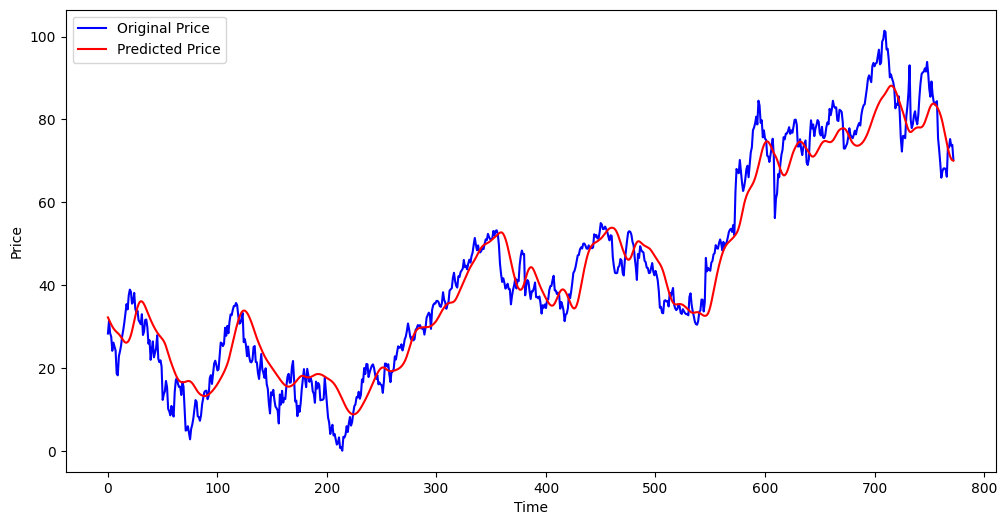

In [63]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Model evaluation

In [64]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  5.020350854203275


Observation: MAE of 5.02 means that, on average, your model's predictions are off by about ₹5 per stock.
If the stock price is around ₹1000, an error of ₹5 is quite small (~0.5%), meaning the model is performing well.

If the stock price is around ₹50, an error of ₹5 is large (10%), meaning the model might need improvements.

